In [1]:
from keras.datasets import cifar100

(X_train, y_train), (X_test, y_test) = cifar100.load_data(label_mode = 'fine')

169009152/169001437 [==============================] - 11s 0us/step


In [2]:
print(X_train.shape, y_train.shape) 
print(X_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [6]:
X_train[:2]

array([[[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [195, 205, 193],
         [212, 224, 204],
         [182, 194, 167]],

        [[255, 255, 255],
         [254, 254, 254],
         [254, 254, 254],
         ...,
         [170, 176, 150],
         [161, 168, 130],
         [146, 154, 113]],

        [[255, 255, 255],
         [254, 254, 254],
         [255, 255, 255],
         ...,
         [189, 199, 169],
         [166, 178, 130],
         [121, 133,  87]],

        ...,

        [[148, 185,  79],
         [142, 182,  57],
         [140, 179,  60],
         ...,
         [ 30,  17,   1],
         [ 65,  62,  15],
         [ 76,  77,  20]],

        [[122, 157,  66],
         [120, 155,  58],
         [126, 160,  71],
         ...,
         [ 22,  16,   3],
         [ 97, 112,  56],
         [141, 161,  87]],

        [[ 87, 122,  41],
         [ 88, 122,  39],
         [101, 134,  56],
         ...,
         [ 34,  36,  10],
        

In [3]:
from keras.utils import to_categorical

y_train= to_categorical(y_train)
y_test = to_categorical(y_test)

In [4]:
y_train.shape

(50000, 100)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=2045)

In [11]:
X_train.shape, X_test.shape

((40000, 32, 32, 3), (10000, 32, 32, 3))

In [20]:
from keras.preprocessing.image import ImageDataGenerator

X_train_datagen = ImageDataGenerator(rescale= 1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2,
                                   shear_range=0.2, zoom_range=0.2, horizontal_flip=True, vertical_flip=True, 
                                   fill_mode='nearest')
X_valid_datagen = ImageDataGenerator(rescale= 1./255)

train_generator = X_train_datagen.flow(X_train, y_train, batch_size=1000)
valid_generator = X_valid_datagen.flow(X_valid, y_valid, batch_size=1000)

In [13]:
print(type(X_train_datagen))

<class 'tensorflow.python.keras.preprocessing.image.ImageDataGenerator'>


In [16]:
print(type(y_train))

<class 'numpy.ndarray'>


In [21]:

from keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
#model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(units=512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=100, activation='softmax'))

model.summary()

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 3, 3, 128)         147584    
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)             

In [30]:
print(40000/1000)
print(10000/1000)

40.0
10.0


In [22]:
%%time
Hist = model.fit(train_generator, steps_per_epoch=40 ,
                       epochs = 50,
                       batch_size = 128,
                       validation_data=valid_generator, validation_steps=10)

Epoch 1/50
40/40 [==============================] - 18s 438ms/step - loss: 4.5549 - accuracy: 0.0170 - val_loss: 4.3117 - val_accuracy: 0.0326
Epoch 2/50
40/40 [==============================] - 17s 430ms/step - loss: 4.3254 - accuracy: 0.0383 - val_loss: 4.0882 - val_accuracy: 0.0707
Epoch 3/50
40/40 [==============================] - 17s 427ms/step - loss: 4.1276 - accuracy: 0.0630 - val_loss: 3.9084 - val_accuracy: 0.0984
Epoch 4/50
40/40 [==============================] - 17s 430ms/step - loss: 3.9962 - accuracy: 0.0799 - val_loss: 3.8416 - val_accuracy: 0.1091
Epoch 5/50
40/40 [==============================] - 17s 428ms/step - loss: 3.9075 - accuracy: 0.0919 - val_loss: 3.7582 - val_accuracy: 0.1199
Epoch 6/50
40/40 [==============================] - 17s 427ms/step - loss: 3.8283 - accuracy: 0.1059 - val_loss: 3.6295 - val_accuracy: 0.1494
Epoch 7/50
40/40 [==============================] - 17s 430ms/step - loss: 3.7635 - accuracy: 0.1157 - val_loss: 3.5363 - val_accuracy: 0.1603

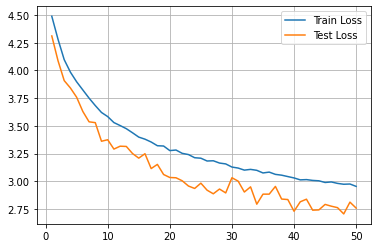

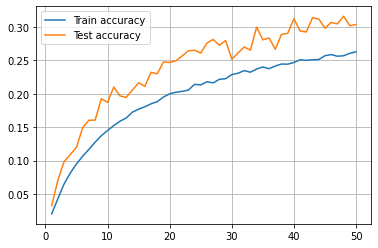

In [24]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist.history['loss'])+1)

plt.plot(epochs, Hist.history['loss'])
plt.plot(epochs, Hist.history['val_loss'])
plt.legend(['Train Loss', 'Test Loss'])
plt.grid()
plt.show()

plt.plot(epochs, Hist.history['accuracy'])
plt.plot(epochs, Hist.history['val_accuracy'])
plt.legend(['Train accuracy', 'Test accuracy'])
plt.grid()
plt.show()

In [28]:
test_datagen = ImageDataGenerator(rescale= 1./255)

test_generator = test_datagen.flow(X_test, y_test, batch_size=1000)

loss, accuracy = model.evaluate(test_generator, steps=10)
loss, accuracy

10/10 [==============================] - 0s 32ms/step - loss: 2.6458 - accuracy: 0.3429


(2.645827293395996, 0.34290000796318054)

# BN - 별 차이는 없음/ 오히려 0.03 떨어짐/ overfitting은 줄어듬

In [30]:

from keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(units=512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=100, activation='softmax'))

model.summary()

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
batch_normalization_6 (Batch (None, 11, 11, 64)        256       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 9, 9, 128)         73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 4, 4, 128)        

In [26]:
%%time
Hist_BN = model.fit(train_generator, steps_per_epoch=40 ,
                       epochs = 100,
                       validation_data=valid_generator, validation_steps=10)

Epoch 1/50
40/40 [==============================] - 18s 437ms/step - loss: 5.1541 - accuracy: 0.0366 - val_loss: 4.7299 - val_accuracy: 0.0121
Epoch 2/50
40/40 [==============================] - 17s 431ms/step - loss: 4.2614 - accuracy: 0.0793 - val_loss: 5.1156 - val_accuracy: 0.0121
Epoch 3/50
40/40 [==============================] - 17s 428ms/step - loss: 4.0224 - accuracy: 0.1044 - val_loss: 5.2801 - val_accuracy: 0.0119
Epoch 4/50
40/40 [==============================] - 17s 424ms/step - loss: 3.8775 - accuracy: 0.1178 - val_loss: 5.7115 - val_accuracy: 0.0147
Epoch 5/50
40/40 [==============================] - 17s 428ms/step - loss: 3.7155 - accuracy: 0.1409 - val_loss: 6.0159 - val_accuracy: 0.0102
Epoch 6/50
40/40 [==============================] - 17s 427ms/step - loss: 3.6294 - accuracy: 0.1548 - val_loss: 5.9948 - val_accuracy: 0.0261
Epoch 7/50
40/40 [==============================] - 17s 429ms/step - loss: 3.5516 - accuracy: 0.1659 - val_loss: 6.0695 - val_accuracy: 0.0327

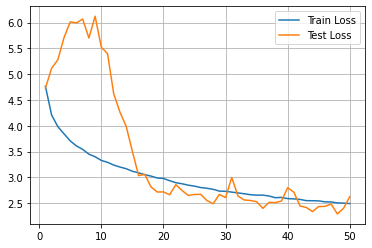

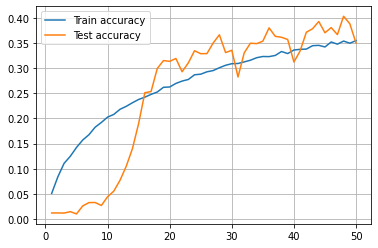

In [27]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_BN.history['loss'])+1)

plt.plot(epochs, Hist_BN.history['loss'])
plt.plot(epochs, Hist_BN.history['val_loss'])
plt.legend(['Train Loss', 'Test Loss'])
plt.grid()
plt.show()

plt.plot(epochs, Hist_BN.history['accuracy'])
plt.plot(epochs, Hist_BN.history['val_accuracy'])
plt.legend(['Train accuracy', 'Test accuracy'])
plt.grid()
plt.show()

In [ ]:
test_datagen = ImageDataGenerator(rescale= 1./255)

test_generator = test_datagen.flow(X_test, y_test, batch_size=1000)

loss, accuracy = model.evaluate(test_generator, steps=10)
loss, accuracy

22/22 [==============================] - 1s 26ms/step - loss: 2.7390 - accuracy: 0.3118


(2.7389678955078125, 0.3118000030517578)

# layer +/ epoch +50/

In [36]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))

model.add(layers.Conv2D(256, (3,3), activation='relu'))
model.add(layers.Conv2D(256, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(units=512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=100, activation='softmax'))

model.summary()

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 26, 26, 64)        36928     
_________________________________________________________________
batch_normalization_12 (Batc (None, 26, 26, 64)        256       
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 24, 24, 128)       73856     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 10, 10, 128)     

In [ ]:
%%time
Hist_other = model.fit(train_generator, steps_per_epoch=40 ,
                       epochs = 50,
                       validation_data=valid_generator, validation_steps=10)

Epoch 1/50
40/40 [==============================] - 21s 457ms/step - loss: 4.8011 - accuracy: 0.0204 - val_loss: 4.4862 - val_accuracy: 0.0190
Epoch 2/50
40/40 [==============================] - 19s 463ms/step - loss: 4.4138 - accuracy: 0.0386 - val_loss: 4.5505 - val_accuracy: 0.0178
Epoch 3/50
40/40 [==============================] - 19s 467ms/step - loss: 4.2760 - accuracy: 0.0500 - val_loss: 4.5197 - val_accuracy: 0.0203
Epoch 4/50
40/40 [==============================] - 19s 462ms/step - loss: 4.1866 - accuracy: 0.0589 - val_loss: 4.5609 - val_accuracy: 0.0364
Epoch 5/50
40/40 [==============================] - 19s 462ms/step - loss: 4.0990 - accuracy: 0.0698 - val_loss: 4.4871 - val_accuracy: 0.0431
Epoch 6/50
40/40 [==============================] - 19s 464ms/step - loss: 4.0131 - accuracy: 0.0762 - val_loss: 4.7989 - val_accuracy: 0.0197
Epoch 7/50
40/40 [==============================] - 19s 464ms/step - loss: 3.9490 - accuracy: 0.0849 - val_loss: 4.8146 - val_accuracy: 0.0233